In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data (Data Preparation)

In [2]:
df_orders = pd.read_csv('./data/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
df_order_payments = pd.read_csv('./data/order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
df_order_items = pd.read_csv('./data/order_items_dataset.csv')
df_order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#group order items by order_id
df_order_items_grouped = df_order_items.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
df_order_items_grouped.head()

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


In [6]:
df_order_items_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       98666 non-null  object 
 1   price          98666 non-null  float64
 2   freight_value  98666 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [7]:
#group order payments by order_id
df_order_payments_grouped = df_order_payments.groupby('order_id').agg({'payment_value': 'sum'}).reset_index()
#order id as index
df_order_payments_grouped.head()

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [8]:
df_order_payments_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       99440 non-null  object 
 1   payment_value  99440 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [9]:
df_customer = pd.read_csv('./data/customers_dataset.csv')
df_customer.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
df_customer['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [11]:
#join dataframes
df = df_orders.merge(df_order_items_grouped, on='order_id', how='left')
df = df.merge(df_order_payments_grouped, on='order_id', how='left')
df = df.merge(df_customer, on='customer_id', how='left')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99,8.72,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70,22.76,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90,19.22,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00,27.20,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90,8.72,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   price                          98666 non-null  float64
 9   freight_value                  98666 non-null  float64
 10  payment_value                  99440 non-null  float64
 11  customer_unique_id             99441 non-null  object 
 12  customer_zip_code_prefix       99441 non-null 

In [13]:
#convert date columns to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   price                          98666 non-null  float64       
 9   freight_value                  98666 non-null  float64       
 10  payment_value                  99440 non-null  float64       
 11  customer_unique

In [14]:
#calculate recency
df_recency = df.groupby('customer_unique_id').agg({'order_purchase_timestamp': 'max'}).reset_index()
#calculate recency
df_recency['recency'] = (df_recency['order_purchase_timestamp'].max() - df_recency['order_purchase_timestamp']).dt.days
df_recency.head()


,customer_unique_id,order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,163
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,585
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,369
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,336


In [15]:
#calculate frequency
df_frequency = df.groupby('customer_unique_id').agg({'order_id': 'count'}).reset_index()
df_frequency.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [16]:
df_frequency.rename(columns={'order_id': 'frequency'}, inplace=True)
df_frequency.sort_values(by='frequency', ascending=False).head()

,customer_unique_id,frequency
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [17]:
#calculate monetary value
df_monetary = df.groupby('customer_unique_id').agg({'payment_value': 'sum'}).reset_index()
df_monetary.rename(columns={'payment_value': 'monetary'}, inplace=True)
df_monetary.sort_values(by='monetary', ascending=False).head()
df_monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [18]:
#join dataframes
df_rfm = df_recency.merge(df_frequency, on='customer_unique_id', how='left')
df_rfm = df_rfm.merge(df_monetary, on='customer_unique_id', how='left')
df_rfm.drop('order_purchase_timestamp', axis=1, inplace=True)
df_rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


In [19]:
df_rfm.sort_values(by='frequency', ascending=False).head()
# df_rfm.to_csv('./data_rfm/RFM.csv', index=False)

In [20]:
df_rfm.describe()

,recency,frequency,monetary
count,96096.000000,96096.000000,96096.000000
mean,287.735691,1.034809,166.592492
std,153.414676,0.214384,231.428332
min,0.000000,1.000000,0.000000
25%,163.000000,1.000000,63.120000
50%,268.000000,1.000000,108.000000
75%,397.000000,1.000000,183.530000
max,772.000000,17.000000,13664.080000


<AxesSubplot:>

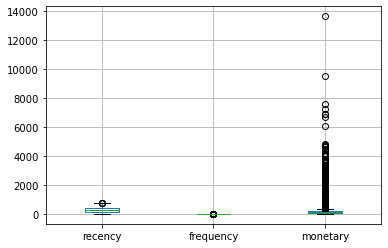

In [21]:
#check outliers
df_rfm.boxplot()


In [22]:
#calculate quartiles
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 163.0, 0.5: 268.0, 0.75: 397.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 63.12, 0.5: 108.0, 0.75: 183.53}}

In [23]:
#kebalik
#create function to calculate rfm score
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

#create function to calculate rfm score
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

#calculate rfm score
df_rfm['r_quartile'] = df_rfm['recency'].apply(RScore, args=('recency', quantiles,))
df_rfm['f_quartile'] = df_rfm['frequency'].apply(FMScore, args=('frequency', quantiles,))
df_rfm['m_quartile'] = df_rfm['monetary'].apply(FMScore, args=('monetary', quantiles,))
df_rfm.head()

,customer_unique_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2,1,4


In [24]:
#calculate rfm score
df_rfm['RFMScoreString'] = df_rfm.r_quartile.map(str) \
                            + df_rfm.f_quartile.map(str) \
                            + df_rfm.m_quartile.map(str)

#calculate rfm score
df_rfm['RFMScore'] = df_rfm.r_quartile + df_rfm.f_quartile + df_rfm.m_quartile
df_rfm.head()

,customer_unique_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScoreString,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,3,413,8
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1,411,6
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,2,112,4
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2,1,1,211,4
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2,1,4,214,7


In [25]:
#create labels from rfm score
def rfm_label(df):
    if df['RFMScore'] >= 10:
        return 'Top Customers'
    elif ((df['RFMScore'] >= 8) and (df['RFMScore'] < 10)):
        return 'High Value Customers'
    elif ((df['RFMScore'] >= 6) and (df['RFMScore'] < 8)):
        return 'Medium Value Customers'
    elif ((df['RFMScore'] >= 4) and (df['RFMScore'] < 6)):
        return 'Low Value Customers'
    elif (df['RFMScore'] < 4):
        return 'Lost Customer'



#calculate rfm label
df_rfm['RFMLabel'] = df_rfm.apply(rfm_label, axis=1)
df_rfm.head()

,customer_unique_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScoreString,RFMScore,RFMLabel
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,3,413,8,High Value Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1,411,6,Medium Value Customers
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,2,112,4,Low Value Customers
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2,1,1,211,4,Low Value Customers
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2,1,4,214,7,Medium Value Customers


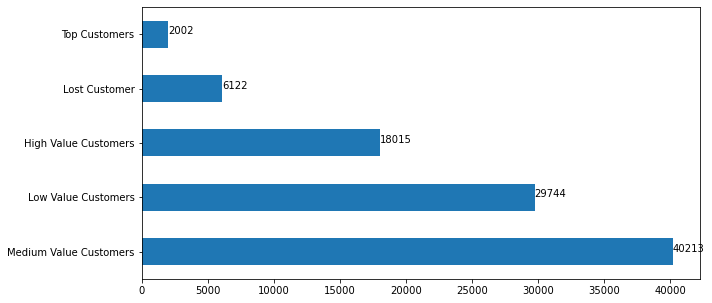

In [26]:
#visualize rfm label distribution
df_rfm['RFMLabel'].value_counts().plot(kind='barh', figsize=(10, 5))
#show value
for index, value in enumerate(df_rfm['RFMLabel'].value_counts().values):
    plt.text(value, index, str(value))
plt.show()

Bisa dilihat berdasarkan visualisasi diatas bahwa :
1. Customer terbanyak berada disegment Medium Value Customer sebanyak 40213. Oleh karena itu segmentasi ini akan menjadi target utama untuk mengadakan promosi.
2. Customer dengan segment Lost Customer dan Low Value Customers harus tetap dijaga untuk meningkatkan transaksinya dengan promosi khusus untuk segmentasi ini.
3. Customer dengan segment Top dan High Value Customers harus tetap dijaga konsistensi transaksinya dengan promosi khusus untuk segmentasi ini.
